## Exploring some basic questions using a data base of dogs and their owners from switzerland
Source: https://www.kaggle.com/kmader/dogs-of-zurich

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set('notebook')
fol_data = '../offline_data' # Where I keep the data

In [3]:
# Loading data, just using one of the datasets here
fname = fol_data + '/dog_data/20151001hundehalter.csv'
df1 = pd.read_csv(fname)
#fname = fol_data + '/dog_data/20160307hundehalter.csv'
#df2 = pd.read_csv(fname)
#fname = fol_data + '/dog_data/20170308hundehalter.csv'
#df3 = pd.read_csv(fname)
#df1 = df1.set_index('HALTER_ID')
#df2 = df2.set_index('HALTER_ID')
#df3 = df3.set_index('HALTER_ID')
#df = df1 | df2 | df3

### German translations
- ALTER -> Age
- GESCHLECHT -> Gender
- STADTKREIS -> City Quarter or District
- RASSE1 -> Dog's Primary Breed
- RASSE2 -> Dog's Secondary Breed
- GEBURTSJAHR_HUND -> Dog's Year of Birth
- GESCHLECHT_HUND -> Dog's Gender
- HUNDEFARBE -> Dog's Color

In [4]:
df1.head(5)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss


## Some questions we might be able to answer
- What are the most popular breeds, genders, colors (ranking)
- Do women or men owners prefer a certain dog gender? Can we say this with statistical significance?!
- Do women or men tend to have multiple dogs?
- Is there a relationship between age with breed and gender or color?


### Other questions not answered
- total dogs born each year
- breed distribution by year
- gender distribution by year

In [5]:
# do we trust that there are not duplicates? Not sure
#df1 = df1.drop_duplicates()

In [6]:
# First, we must see who has more than one dog and make a new dataframe of unique owners
(hal_un, I_un) = np.unique(df1['HALTER_ID'],return_index=True)
df1u = df1.iloc[I_un]

# Count dogs
ndogs = []
for h in hal_un:
    ndogs.append(np.sum(df1['HALTER_ID']==h))
    
# New df
df1u.insert(4,"ndogs",ndogs)

In [7]:
# 10 most popular dog colors, black is most popular
breed = df1.groupby("HUNDEFARBE").count()
breed = breed.sort_values('ALTER',ascending=False)
breed.head(10)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND
HUNDEFARBE,,,,,,,,,,,,
schwarz,764,763,764,763,763,764,79,70,0,724,764,764
tricolor,669,669,669,668,668,669,75,54,0,652,669,669
weiss,544,544,544,544,544,544,30,22,0,527,544,544
braun,530,530,530,530,530,530,47,34,0,520,530,530
schwarz/weiss,443,443,443,443,443,443,62,51,0,429,443,443
schwarz/braun,363,363,363,363,363,363,48,55,0,356,363,363
beige,342,342,342,342,342,342,28,20,0,338,342,342
braun/weiss,215,215,215,215,215,215,23,22,0,213,215,215
weiss/braun,196,196,196,196,196,196,26,10,0,194,196,196


In [8]:
df1u

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,ndogs,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,1,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,1,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,1,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,1,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,1,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,128462,21-30,w,5.0,1,52.0,Old Englische Bulldogge,NaN,NaN,NaN,I,2015,m,weiss gestromt
6975,128471,21-30,w,8.0,2,83.0,Tibetan Spaniel,NaN,NaN,NaN,K,2007,w,braun/beige
6977,128479,51-60,w,6.0,1,63.0,Lagotto Romagnolo,Mischling,NaN,NaN,I,2007,m,weiss/grau
6978,128482,21-30,w,9.0,1,91.0,Yorkshire Terrier,NaN,NaN,NaN,K,2015,w,schwarz/braun/grau


,HALTER_ID,ALTER,STADTKREIS,ndogs,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
GESCHLECHT,,,,,,,,,,,,,
m,2040,2038,2038,2040,2038,2040,215,164,0,2001,2040,2040,2040
w,4276,4276,4276,4276,4276,4276,395,341,0,4157,4276,4276,4276


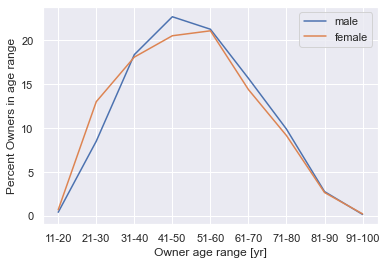

In [9]:
I = df1u['GESCHLECHT'] == 'm'
breed = df1u[I].groupby(["ALTER"]).count()
breed = breed.sort_values('ALTER',ascending=False)/len(df1u[I])
#breed.head(10)
plt.plot(100*breed['HALTER_ID'],label='male')
plt.ylabel('Percent Owners in age range')
plt.xlabel('Owner age range [yr]')
plt.gca().invert_xaxis()

I = df1u['GESCHLECHT'] == 'w'
breed = df1u[I].groupby(["ALTER"]).count()
breed = breed.sort_values('ALTER',ascending=False)/len(df1u[I])
#breed.head(10)
plt.plot(100*breed['HALTER_ID'],label='female')
plt.legend()

df1u.groupby(["GESCHLECHT"]).count()

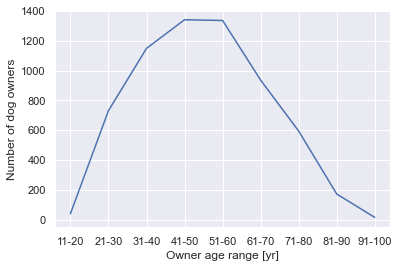

In [10]:
# Distribution of age of owners
breed = df1u.groupby("ALTER").count()
breed = breed.sort_values('ALTER',ascending=False)
#breed.head(10)
plt.plot(breed['HALTER_ID'])
plt.ylabel('Number of dog owners')
plt.xlabel('Owner age range [yr]')
plt.gca().invert_xaxis()
#plt.grid()

In [11]:
# 10 most popular dog colors, Mixed small breed is most popular followed by Chihuahua
breed = df1.groupby("RASSE1").count()
breed = breed.sort_values('ALTER',ascending=False)
breed.head(10)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
RASSE1,,,,,,,,,,,,
Mischling klein,652,652,652,652,652,5,1,0,652,652,652,652
Chihuahua,495,495,495,495,495,12,21,0,495,495,495,495
Labrador Retriever,446,446,446,446,446,49,57,0,446,446,446,446
Jack Russel Terrier,298,298,298,298,298,34,16,0,298,298,298,298
Yorkshire Terrier,280,280,280,280,280,15,10,0,280,280,280,280
Malteser,192,192,192,192,192,20,19,0,192,192,192,192
Mops,178,178,178,178,178,2,13,0,178,178,178,178
Golden Retriever,174,174,174,174,174,9,22,0,174,174,174,174
Französische Bulldogge,170,170,170,170,170,1,2,0,170,170,170,170


### Mixed small breed is the most popular
<img src="https://zergportal.de/files/Hund2_680855.jpeg" alt="Mixed small breed" width="200"/> 

In [12]:
# Women appear to be much more likely to own a dog (assumming a representative sample)
breed = df1.groupby("GESCHLECHT").count()
breed = breed.sort_values('ALTER',ascending=False)
breed['HALTER_ID']

GESCHLECHT
w    4782
m    2198
Name: HALTER_ID, dtype: int64

### Is there  a gender preference for dogs based on one's own gender?
Note GESCHLECHT_HUND is the dog's gender, while GESCHLECHT is the owner.
Also we will restrict this to just single dog owners for simplicity

In [13]:
# Let's remove mulit-dog owners
df1us = df1u
df1us = df1us.loc[df1us['ndogs']<2]

# Using pivot
df1us.pivot_table('ALTER',index=['GESCHLECHT'], columns = ['GESCHLECHT_HUND'],aggfunc='count')

GESCHLECHT_HUND,m,w
GESCHLECHT,,
m,1029,865
w,1838,2029


In [14]:
#Alternatively, we can use a groupby
df1us.groupby(['GESCHLECHT','GESCHLECHT_HUND'])['ALTER'].count()

GESCHLECHT  GESCHLECHT_HUND
m           m                  1029
            w                   865
w           m                  1838
            w                  2029
Name: ALTER, dtype: int64

There appears to be a slight preference to have a dog with one's own gender, but is it statistically significant?

### Here we can employ a contigency table with a chi-2 (Kai) test

In [15]:
from scipy import stats
ftable = df1us.pivot_table('ALTER',index=['GESCHLECHT'], columns = ['GESCHLECHT_HUND'],aggfunc='count')
ctable = stats.chi2_contingency(ftable)
ctable

(23.23735510306477,
 1.431888160818495e-06,
 1,
 array([[ 942.56170804,  951.43829196],
        [1924.43829196, 1942.56170804]]))

According to a chi-squared test, we can reject the null hypothesis at a p-value of 1e-6 and say that difference in distribution is significant.

In [39]:
men_tot = 1029+865
men_p_likely_m = (1029-men_tot/2)/(men_tot/2)

wom_tot = 1838+2029
wom_p_likely_w = (2029-wom_tot/2)/(wom_tot/2)

print('Men are {:3.2f}% more likely to own a male dog'.format(100*men_p_likely_m))
print('Women are {:3.2f}% more likely to own a female dog'.format(100*wom_p_likely_w))


Men are 8.66% more likely to own a male dog
Women are 4.94% more likely to own a female dog


### Dogs born each year

Can't figure out how to remove the bad data!?!?

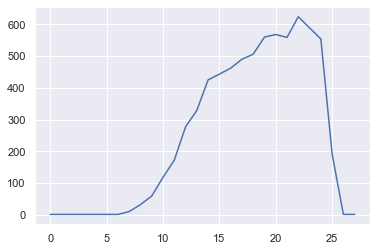

In [41]:
dog_by_yr = df1.groupby(['GEBURTSJAHR_HUND'])['ALTER'].count()
dog_by_yr[(dog_by_yr < 1900) & (dog_by_yr > 2021)] = np.nan
dog_by_yr
plt.plot(dog_by_yr.values)

### Is there a relationship between age with breed and gender or color?

In [52]:
# Take only the top 10 colors
colors = df1u.groupby('HUNDEFARBE')['ALTER'].count().sort_values(ascending=False)
# Remove dogs of uncommmon color
msk2 = []
for c in df1u['HUNDEFARBE']:
    if c in colors[:10]:
        msk2.append(True)
    else:
        msk2.append(False)

dfsr = df1u[msk2]
dfsr.shape

(3821, 14)

In [43]:
dfsr

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,ndogs,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,1,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
2,695,41-50,m,6.0,1,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,1,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,1,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
5,4004,61-70,w,3.0,1,34.0,Dackel,NaN,NaN,NaN,K,2010,m,braun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,128446,41-50,w,7.0,1,74.0,Zwergpudel,NaN,NaN,NaN,K,2008,w,schwarz/braun
6969,128447,51-60,w,7.0,1,74.0,Jack Russel Terrier,NaN,NaN,NaN,K,2015,m,tricolor
6970,128456,51-60,w,8.0,1,83.0,Mischling klein,NaN,NaN,NaN,K,2004,w,beige
6972,128459,61-70,w,11.0,1,115.0,Mischling klein,NaN,NaN,NaN,K,2015,w,tricolor


In [44]:
# Remove nan
dfsr = dfsr.drop(['RASSE1_MISCHLING','RASSE2','RASSE2_MISCHLING'],axis=1)
dfsr = dfsr.dropna()
dfsr.shape

(3709, 11)

In [45]:
# Store for later
df_tree = dfsr

In [46]:
# Convert age to number avg
agefloat = []
for age in dfsr['ALTER']:
    agefloat.append(np.mean([int(s) for s in age.split('-') if s.isdigit()]))


In [47]:
dfsr['ALTER'] = agefloat

In [48]:
df_dum = pd.get_dummies(dfsr[['HUNDEFARBE','GESCHLECHT']])

In [50]:
df_dum.head(3)

,HUNDEFARBE_beige,HUNDEFARBE_black/tan,HUNDEFARBE_braun,HUNDEFARBE_braun/weiss,HUNDEFARBE_schwarz,HUNDEFARBE_schwarz/braun,HUNDEFARBE_schwarz/weiss,HUNDEFARBE_tricolor,HUNDEFARBE_weiss,HUNDEFARBE_weiss/braun,GESCHLECHT_m,GESCHLECHT_w
0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,1


In [51]:
dfsr.head(3)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,ndogs,STADTQUARTIER,RASSE1,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,55.5,m,9.0,1,92.0,Welsh Terrier,K,2011,w,schwarz/braun
2,695,45.5,m,6.0,1,63.0,Labrador Retriever,I,2012,w,braun
3,893,65.5,w,7.0,1,71.0,Mittelschnauzer,I,2010,w,schwarz


Note: Why did dfsr | df_dum not work?

In [27]:
df_reg = dfsr.join(df_dum)
df_reg

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,ndogs,STADTQUARTIER,RASSE1,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,...,HUNDEFARBE_braun,HUNDEFARBE_braun/weiss,HUNDEFARBE_schwarz,HUNDEFARBE_schwarz/braun,HUNDEFARBE_schwarz/weiss,HUNDEFARBE_tricolor,HUNDEFARBE_weiss,HUNDEFARBE_weiss/braun,GESCHLECHT_m,GESCHLECHT_w
0,126,55.5,m,9.0,1,92.0,Welsh Terrier,K,2011,w,...,0,0,0,1,0,0,0,0,1,0
2,695,45.5,m,6.0,1,63.0,Labrador Retriever,I,2012,w,...,1,0,0,0,0,0,0,0,1,0
3,893,65.5,w,7.0,1,71.0,Mittelschnauzer,I,2010,w,...,0,0,1,0,0,0,0,0,0,1
4,1177,55.5,m,10.0,1,102.0,Shih Tzu,K,2011,m,...,0,0,0,0,1,0,0,0,1,0
5,4004,65.5,w,3.0,1,34.0,Dackel,K,2010,m,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,128446,45.5,w,7.0,1,74.0,Zwergpudel,K,2008,w,...,0,0,0,1,0,0,0,0,0,1
6969,128447,55.5,w,7.0,1,74.0,Jack Russel Terrier,K,2015,m,...,0,0,0,0,0,1,0,0,0,1
6970,128456,55.5,w,8.0,1,83.0,Mischling klein,K,2004,w,...,0,0,0,0,0,0,0,0,0,1
6972,128459,65.5,w,11.0,1,115.0,Mischling klein,K,2015,w,...,0,0,0,0,0,1,0,0,0,1


In [28]:
#INOPUT: is ndogs,
df_X = df_reg.drop(['RASSE1','HUNDEFARBE','ALTER','GESCHLECHT','RASSENTYP','STADTQUARTIER','STADTKREIS','GESCHLECHT_HUND','HALTER_ID','GEBURTSJAHR_HUND'],axis=1)
df_y = df_reg['ALTER']
df_X

,ndogs,HUNDEFARBE_beige,HUNDEFARBE_black/tan,HUNDEFARBE_braun,HUNDEFARBE_braun/weiss,HUNDEFARBE_schwarz,HUNDEFARBE_schwarz/braun,HUNDEFARBE_schwarz/weiss,HUNDEFARBE_tricolor,HUNDEFARBE_weiss,HUNDEFARBE_weiss/braun,GESCHLECHT_m,GESCHLECHT_w
0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,1,0
5,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,1,0,0,0,0,0,1,0,0,0,0,0,1
6969,1,0,0,0,0,0,0,0,1,0,0,0,1
6970,1,1,0,0,0,0,0,0,0,0,0,0,1
6972,1,0,0,0,0,0,0,0,1,0,0,0,1


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(df_X,df_y)
y_p = LR.predict(df_X)

r2 = r2_score(df_y,y_p)
print(r2)

0.007806743946499606


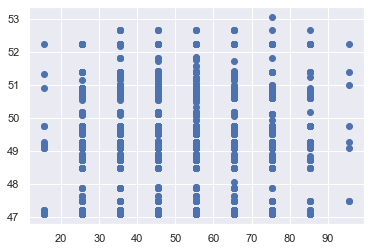

In [30]:
plt.scatter(df_y,y_p)

A small relation here, R2 is quite small, but zero

### Try a Random Forest

In [31]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(df_X,df_y, test_size = 0.20)

0.006807535132208553


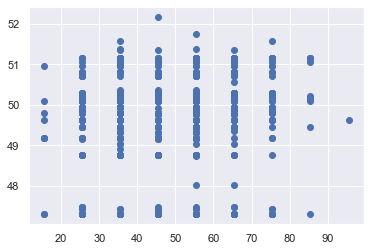

In [32]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_tr,y_tr)


y_pr = regr.predict(X_te)

plt.scatter(y_te,y_pr)
print(r2_score(y_te,y_pr))

A little bit better with the random forest! Interesting.

In [33]:
df1u.keys()
#df1u['ndogs']

Index(['HALTER_ID', 'ALTER', 'GESCHLECHT', 'STADTKREIS', 'ndogs',
       'STADTQUARTIER', 'RASSE1', 'RASSE1_MISCHLING', 'RASSE2',
       'RASSE2_MISCHLING', 'RASSENTYP', 'GEBURTSJAHR_HUND', 'GESCHLECHT_HUND',
       'HUNDEFARBE'],
      dtype='object')

Aggregate by gender and age

In [34]:
df1u.pivot_table('RASSE1',index=['GESCHLECHT'], columns = ['ALTER'],aggfunc='count')

ALTER,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
GESCHLECHT,,,,,,,,,
m,9,174,375,463,434,320,202,57,4
w,31,557,774,878,902,616,392,115,11


In [35]:
df1u

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,ndogs,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,1,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,1,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,1,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,1,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,1,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,128462,21-30,w,5.0,1,52.0,Old Englische Bulldogge,NaN,NaN,NaN,I,2015,m,weiss gestromt
6975,128471,21-30,w,8.0,2,83.0,Tibetan Spaniel,NaN,NaN,NaN,K,2007,w,braun/beige
6977,128479,51-60,w,6.0,1,63.0,Lagotto Romagnolo,Mischling,NaN,NaN,I,2007,m,weiss/grau
6978,128482,21-30,w,9.0,1,91.0,Yorkshire Terrier,NaN,NaN,NaN,K,2015,w,schwarz/braun/grau


In [36]:
df1u.pivot_table('HALTER_ID',index=['ndogs'], columns = ['ALTER'],aggfunc='count')

ALTER,11-20,21-30,31-40,41-50,51-60,61-70,71-80,81-90,91-100
ndogs,,,,,,,,,
1,39.0,679.0,1042.0,1221.0,1196.0,851.0,553.0,166.0,14.0
2,1.0,49.0,102.0,101.0,114.0,75.0,33.0,5.0,1.0
3,NaN,3.0,4.0,14.0,21.0,8.0,7.0,1.0,NaN
4,NaN,NaN,NaN,2.0,3.0,NaN,1.0,NaN,NaN
5,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [37]:
df1u.groupby('GESCHLECHT').mean()

,HALTER_ID,STADTKREIS,ndogs,STADTQUARTIER,RASSE2_MISCHLING,GEBURTSJAHR_HUND
GESCHLECHT,,,,,,
m,100024.038725,7.352306,1.077451,76.045633,NaN,2008.205392
w,103000.699252,7.404116,1.118335,76.616932,NaN,2008.229888


In [38]:
df1u

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,ndogs,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,1,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,1,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,1,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,1,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,1,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,128462,21-30,w,5.0,1,52.0,Old Englische Bulldogge,NaN,NaN,NaN,I,2015,m,weiss gestromt
6975,128471,21-30,w,8.0,2,83.0,Tibetan Spaniel,NaN,NaN,NaN,K,2007,w,braun/beige
6977,128479,51-60,w,6.0,1,63.0,Lagotto Romagnolo,Mischling,NaN,NaN,I,2007,m,weiss/grau
6978,128482,21-30,w,9.0,1,91.0,Yorkshire Terrier,NaN,NaN,NaN,K,2015,w,schwarz/braun/grau
